# StackOverflow Survey 2017 Analysis

...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
# Display all rows of dataframes
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('./survey-results-public.csv')
df.head().T

,0,1,2,3,4
Respondent,1,2,3,4,5
Professional,Student,Student,Professional developer,Professional non-developer who sometimes write...,Professional developer
ProgramHobby,"Yes, both","Yes, both","Yes, both","Yes, both","Yes, I program as a hobby"
Country,United States,United Kingdom,United Kingdom,United States,Switzerland
University,No,"Yes, full-time",No,No,No
EmploymentStatus,"Not employed, and not looking for work",Employed part-time,Employed full-time,Employed full-time,Employed full-time
FormalEducation,Secondary school,Some college/university study without earning ...,Bachelor's degree,Doctoral degree,Master's degree
MajorUndergrad,NaN,Computer science or software engineering,Computer science or software engineering,A non-computer-focused engineering discipline,Computer science or software engineering
HomeRemote,NaN,"More than half, but not all, the time","Less than half the time, but at least one day ...","Less than half the time, but at least one day ...",Never
CompanySize,NaN,20 to 99 employees,"10,000 or more employees","10,000 or more employees",10 to 19 employees


In [6]:
research_columns_all = ['UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'ChallengeMyself',
                        'CompetePeers', 'ChangeWorld', 'HaveWorkedLanguage', 'WantWorkLanguage', 'HaveWorkedFramework',
                        'WantWorkFramework', 'HighestEducationParents']
research_columns_1v = ['UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'ChallengeMyself',
                        'CompetePeers', 'ChangeWorld', 'HighestEducationParents']

In [29]:
(df['HaveWorkedLanguage'].value_counts().head(5))

HaveWorkedLanguage
C#; JavaScript; SQL     1276
JavaScript; PHP; SQL    1143
Java                     913
JavaScript               807
JavaScript; PHP          662
Name: count, dtype: int64

In [7]:
def non_nan_barh(df, collist):
    ''' 
    Create horizontal bar graph diagram for the population ratio (non NaN-ratio) of a given dataframe.
    
    INPUT
    df - pandas dataframe 
    collist - Python list with column names to be included in diagram; empty list []: include all columns of dataframe
    '''   
    
    # Calculate the non-NaN value ratio for each column
    if not collist:
        # Empty column list
        non_nan_ratio = df.notna().mean()
    else:
        # Column list is not empty - more focussed bar graph diagram 
        non_nan_ratio = df[research_columns_all].notna().mean()
        
    nnr_index = non_nan_ratio.index
    non_nan_ratio = non_nan_ratio.iloc[::-1]
        
    # Create a horizontal bar graph
    plt.figure(figsize=(10, len(non_nan_ratio)*0.25))
    non_nan_ratio.plot(kind='barh')  # Change to horizontal bar graph
    plt.title('Non-NaN Value Ratio for Each Column')
    plt.xlabel('Non-NaN Ratio')
    plt.ylabel('Columns')
    plt.xlim(0, 1)  # Set x-axis limits
    plt.grid(axis='x')
    plt.show()

    return

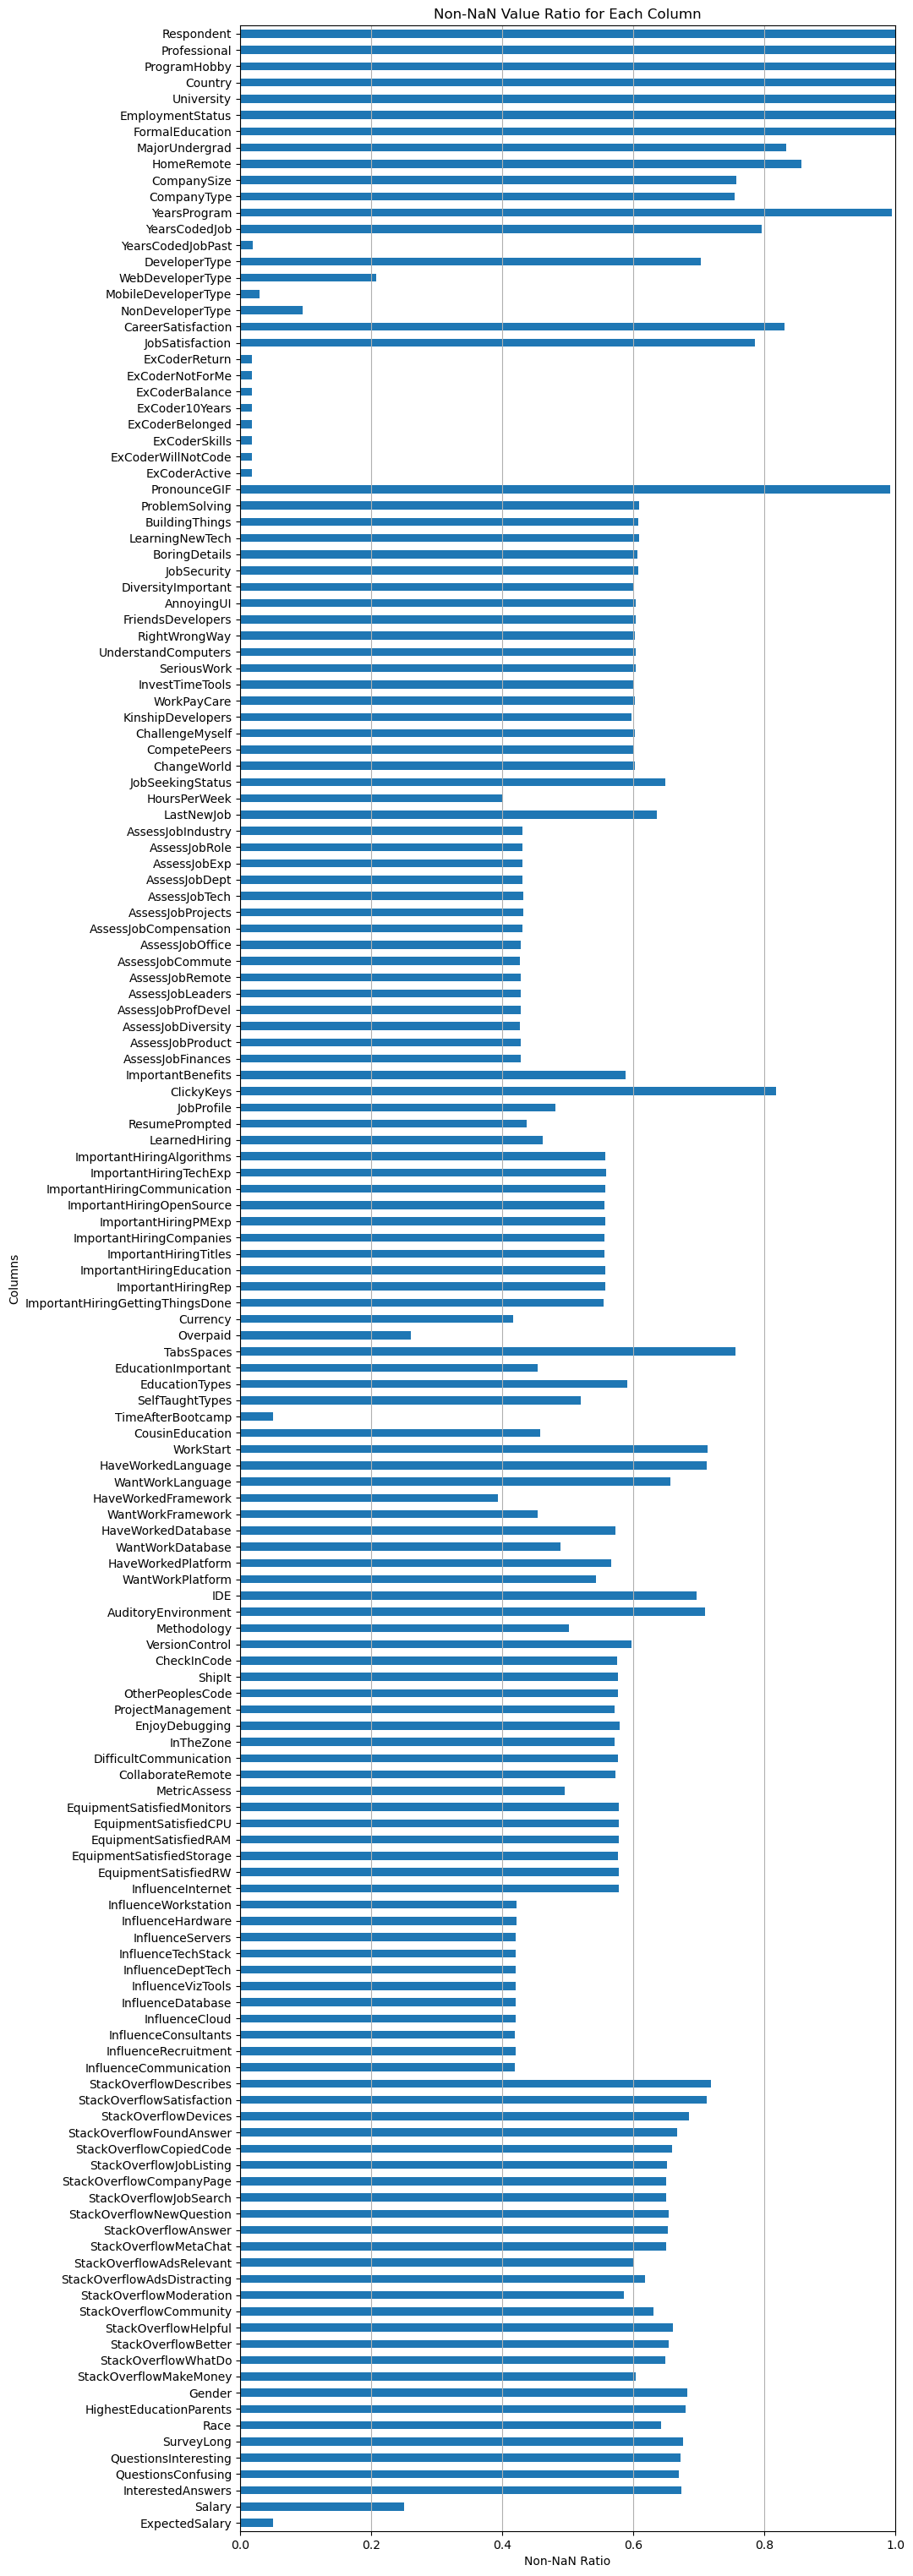

In [8]:
non_nan_barh(df, [])

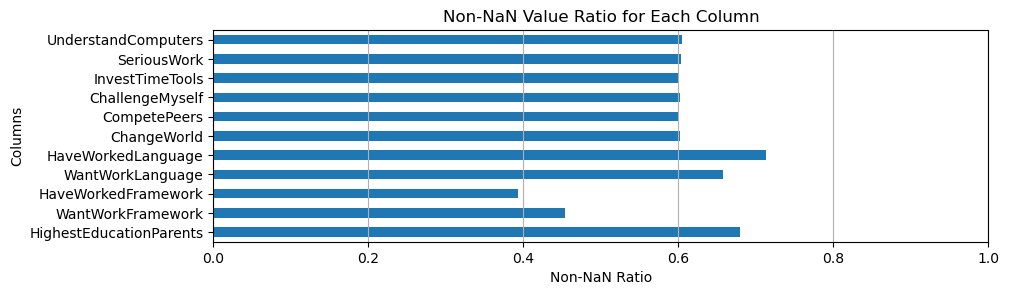

In [9]:
non_nan_barh(df, [research_columns_all])

In [11]:
data_types = df[research_columns_all].dtypes
data_types_df = data_types.reset_index()
data_types_df.columns = ['Column', 'Data Type']
print(data_types_df)

                     Column Data Type
0       UnderstandComputers    object
1               SeriousWork    object
2           InvestTimeTools    object
3           ChallengeMyself    object
4              CompetePeers    object
5               ChangeWorld    object
6        HaveWorkedLanguage    object
7          WantWorkLanguage    object
8       HaveWorkedFramework    object
9         WantWorkFramework    object
10  HighestEducationParents    object


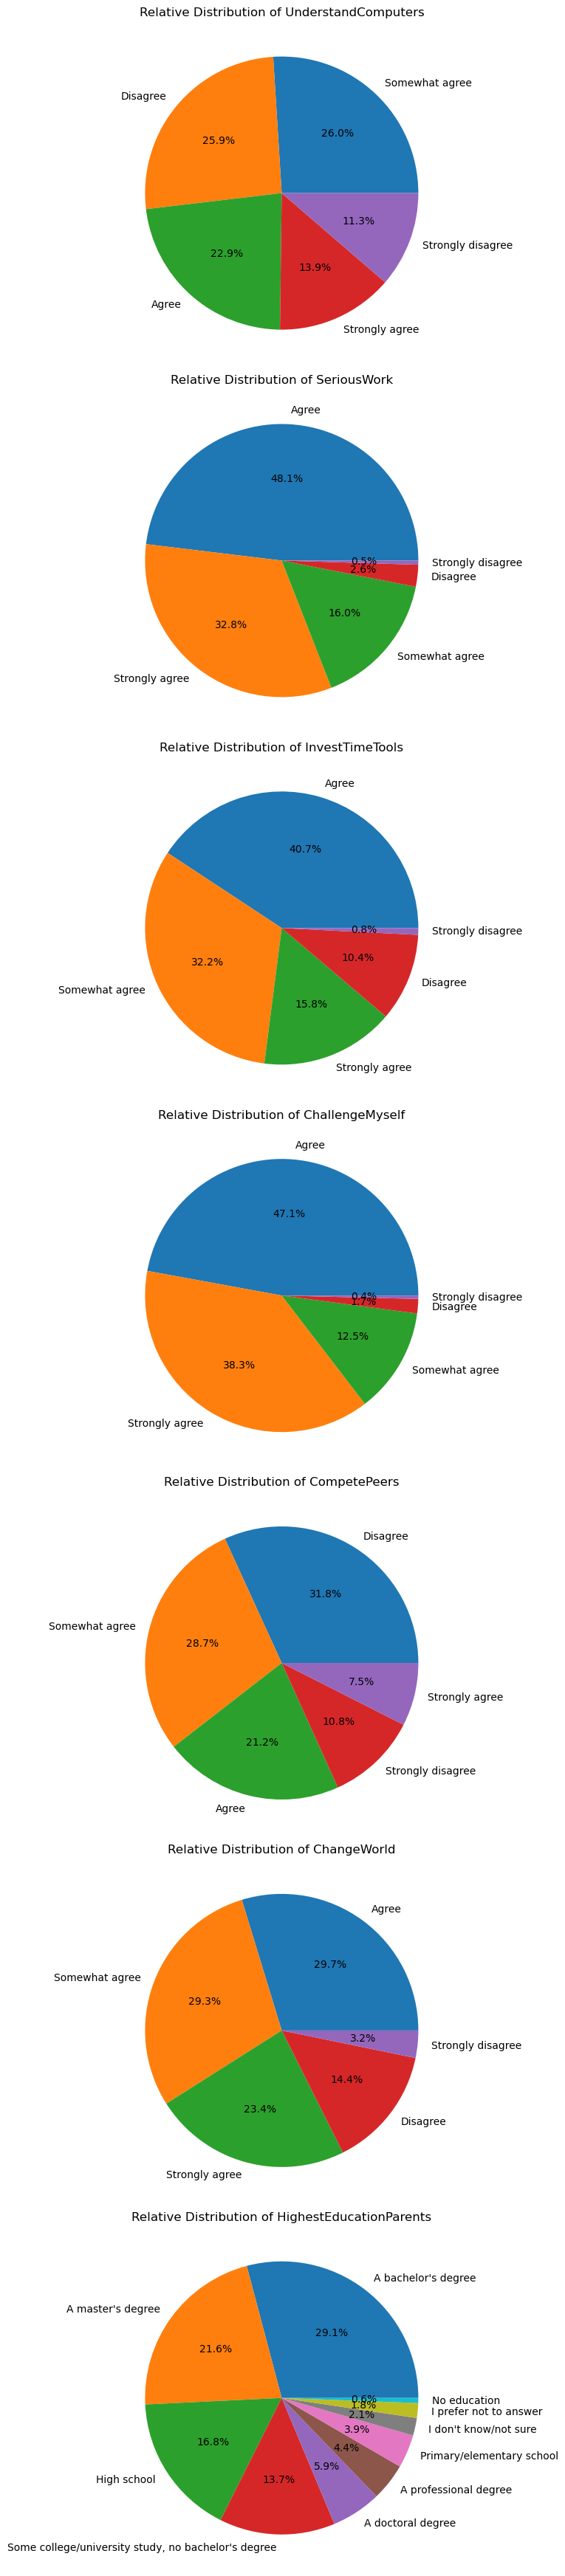

In [15]:
def plot_categorical_distributions(df, collist):
    ''' 
    Create series of bar chart diagrams to show distriution of categorial column values in individual columns
    
    INPUT
    df - pandas dataframe 
    collist - Python list with column names to be included in subplots
    '''   
    num_cols = len(collist)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))
    
    if num_cols == 1:
        axes = [axes]
    
    '''
    for ax, col in zip(axes, collist):
        value_counts = df[col].value_counts(normalize=True)
        ax.bar(value_counts.index.astype(str), value_counts.values)
        ax.set_title(f'Relative Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Relative Frequency')
    '''

    for ax, col in zip(axes, collist):
        value_counts = df[col].value_counts(normalize=True)
        ax.pie(value_counts.values, labels=value_counts.index.astype(str), autopct='%1.1f%%')
        ax.set_title(f'Relative Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df, research_columns_1v)

# #######################################################
# ###                   LESEZEICHEN                   ###
# #######################################################


In [25]:
def split_count_nested(df, col, sep):
    ''' 
    Split up nested cell values in dataframe df and column col seperated by sep and return descended sorted series by number of occurences.
    
    INPUT
    df - pandas dataframe 
    col - Column name within dataframe
    sep - separator literal

    OUTPUT
    count_ser - Series with single values and overall count of occurance within column col in dataframe df
    '''   
    # Split the values and expand into separate rows
    df_expanded = df[col].str.split(sep, expand=True).stack().reset_index(level=1, drop=True)
    df_expanded.name = col
    
    # Calculate the sum for each unique value
    value_counts = df_expanded.value_counts().reset_index()
    value_counts.columns = [col, 'Count']
    
    return value_counts.groupby([col]).sum()

split_count_nested(df, 'HaveWorkedLanguage', ';')



,Count
HaveWorkedLanguage,
C,1411
C#,3880
C++,4628
Clojure,214
CoffeeScript,494
Common Lisp,225
Dart,108
Elixir,223
Erlang,232


In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [ ]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2


#### Question 5

**5.** The default penalty on coefficients using linear regression in sklearn is a ridge (also known as an L2) penalty.  Because of this penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the salary.  The larger the coefficient, the larger the expected impact on salary.  

Use the space below to take a look at the coefficients.  Then use the results to provide the **True** or **False** statements based on the data.

#### Congrats of some kind

Congrats!  Hopefully this was a great review, or an eye opening experience about how to put the steps together for an analysis. In the next lesson, you will look at how take this and show it off to others so they can act on it.